The website FiveThirtyEight has recently released to the public a
significant amount of the data it has used over time in its
statistics-oriented articles. One particular data set of interest
revolves around American college graduates, and their foray into the
workplace. The data can be found at the following link
https://github.com/fivethirtyeight/data/tree/master/college-majors.


We are asking you to conduct some introductory analyses into the
dataset(s) and to report back your results.

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns    

# Part 1

Focusing on the data available for all ages, what does the
distribution of unemployment rates look like among the different major
categories? Come up with a graphical display that allows a reader to
easily make sense of the information.

In [204]:
data = pd.read_csv("C:/Users/Jaqua/Desktop/Data Fellowship Challenge/college-majors/all-ages.csv").sort_values(by=['Major'])

In [142]:
data.head()

,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
159,6201,ACCOUNTING,Business,1779219,1335825,1095027,75379,0.053415,65000,42500,100000.0
160,6202,ACTUARIAL SCIENCE,Business,9763,7846,6880,466,0.056064,72000,53000,115000.0
16,1904,ADVERTISING AND PUBLIC RELATIONS,Communications & Journalism,186829,147433,111552,10624,0.067216,50000,34000,75000.0
41,2401,AEROSPACE ENGINEERING,Engineering,65734,44944,38491,1969,0.041971,80000,58000,110000.0
2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000.0


In [4]:
unemployment = data.groupby('Major_category').agg({'Total':'sum', 
                                                   'Unemployed':'sum', 
                                                   'Employed' : 'sum'}).reset_index().sort_values('Unemployed', 
                                                                                                  ascending=False)
unemployment['Unemployment Rate'] = (unemployment['Unemployed'] / unemployment['Total'])

In [5]:
unemployment.head(-1)

,Major_category,Total,Unemployed,Employed,Unemployment Rate
3,Business,9858741,434397,7529851,0.044062
9,Humanities & Liberal Arts,3738335,179136,2499175,0.047919
7,Engineering,3576013,146389,2621966,0.040936
15,Social Science,2654125,132150,1871803,0.049790
6,Education,4700118,125336,2833199,0.026667
14,Psychology & Social Work,1987278,104206,1411983,0.052437
1,Arts,1805865,104125,1308695,0.057659
4,Communications & Journalism,1803822,101199,1423041,0.056103
5,Computers & Mathematics,1781378,79974,1410607,0.044894
8,Health,2950859,75013,2192692,0.025421


In [6]:
data.Major_category.unique()

array(['Agriculture & Natural Resources', 'Biology & Life Science',
       'Engineering', 'Humanities & Liberal Arts',
       'Communications & Journalism', 'Computers & Mathematics',
       'Industrial Arts & Consumer Services', 'Education',
       'Law & Public Policy', 'Interdisciplinary', 'Health',
       'Social Science', 'Physical Sciences', 'Psychology & Social Work',
       'Arts', 'Business'], dtype=object)

In [7]:
arts = data[data['Major_category'] == 'Arts']
agriculture = data[data['Major_category'] == 'Agriculture & Natural Resources']
bio = data[data['Major_category'] == 'Biology & Life Science']
eng = data[data['Major_category'] == 'Engineering']
hum = data[data['Major_category'] == 'Humanities & Liberal Arts']
com = data[data['Major_category'] == 'Communications & Journalism']
math = data[data['Major_category'] == 'Computers & Mathematics']
indust = data[data['Major_category'] == 'Industrial Arts & Consumer Services']
edu = data[data['Major_category'] == 'Education']
law = data[data['Major_category'] == 'Law & Public Policy']
interdis = data[data['Major_category'] == 'Interdisciplinary']
heal = data[data['Major_category'] == 'Health']
soc = data[data['Major_category'] == 'Social Science']
physci = data[data['Major_category'] == 'Physical Sciences']
psy = data[data['Major_category'] == 'Psychology & Social Work']
bus = data[data['Major_category'] == 'Business']

In [8]:
rc={'font.size': 15, 'axes.labelsize': 15, 'legend.fontsize': 3.0, 
    'axes.titlesize': 20, 'xtick.labelsize': 15, 'ytick.labelsize': 15}

sns.set(rc=rc)

## Unemployment Rates By Category of Major

This section looks at unemployment rates by major categories 

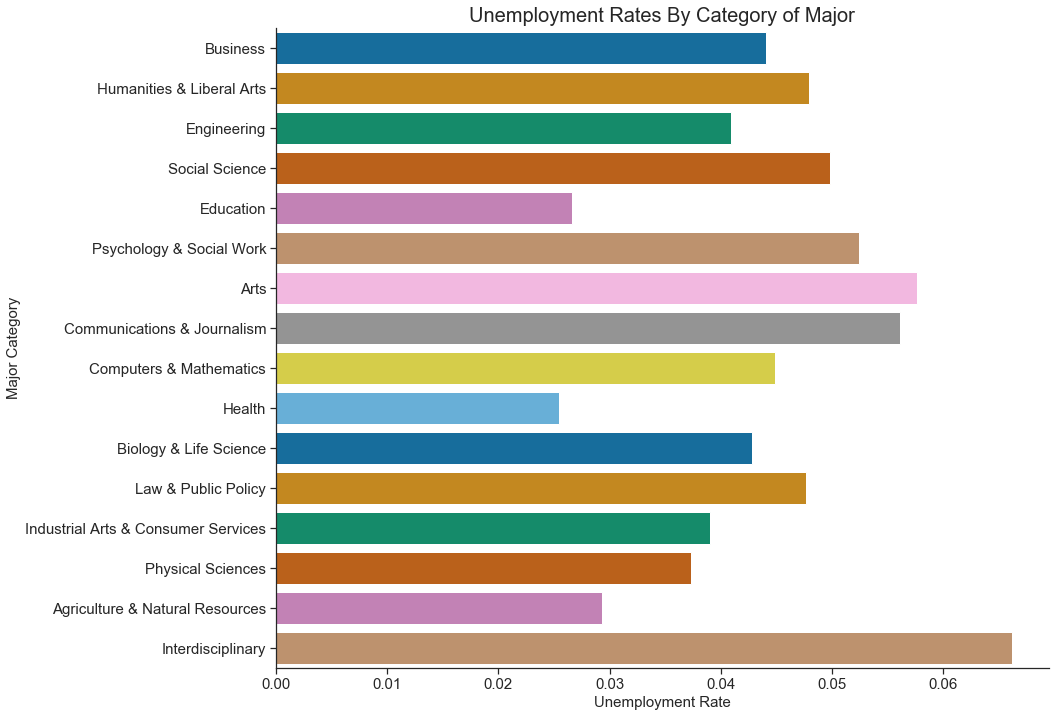

In [9]:
sns.set_style('ticks')

ax = sns.catplot(x="Unemployment Rate", y="Major_category",
            aspect=1.5, orient="h", height=10,
            kind="bar", 
            data=unemployment, 
            palette=sns.color_palette("colorblind", 16));

ax.set(xlabel='Unemployment Rate', ylabel='Major Category', title="Unemployment Rates By Category of Major")
plt.show()

##### This graph shows the distribution of unemployment rates by major category

In [10]:
unemployment.describe()

,Total,Unemployed,Employed,Unemployment Rate
count,1.600000e+01,16.000000,1.600000e+01,16.000000
mean,2.489650e+06,105151.937500,1.796626e+06,0.044263
std,2.329416e+06,100342.866459,1.731035e+06,0.011250
min,4.519900e+04,2990.000000,3.570600e+04,0.025421
25%,1.031678e+06,42376.750000,7.450675e+05,0.038600
50%,1.804844e+06,90586.500000,1.411295e+06,0.044478
75%,3.107148e+06,127039.500000,2.269313e+06,0.050452
max,9.858741e+06,434397.000000,7.529851e+06,0.066152


In [11]:
unemployment.corr()

,Total,Unemployed,Employed,Unemployment Rate
Total,1.000000,0.963120,0.993911,-0.205482
Unemployed,0.963120,1.000000,0.974359,0.003743
Employed,0.993911,0.974359,1.000000,-0.168688
Unemployment Rate,-0.205482,0.003743,-0.168688,1.000000


## Unemployment Rates By Concentration of Major 

This section looks at unemployment rate by concentration. Each graph shows the distribution of unemployment rates by concentration of major. 

### Arts

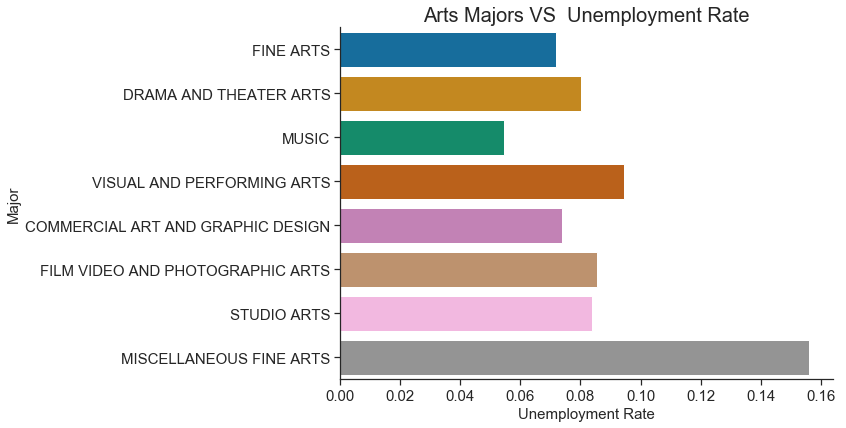

In [12]:
sns.set_style('ticks')


ax = sns.catplot(x="Unemployment_rate", y="Major",
            aspect=2, orient="h", height=6,
            kind="bar", 
            data=arts, 
            palette=sns.color_palette("colorblind"));

ax.set(xlabel='Unemployment Rate', ylabel='Major', title="Arts Majors VS  Unemployment Rate")
plt.show()

In [13]:
arts[['Total','Employed', 'Unemployed', 'Unemployment_rate']].describe()

,Total,Employed,Unemployed,Unemployment_rate
count,8.000000,8.000000,8.000000,8.000000
mean,225733.125000,163586.875000,13015.625000,0.087601
std,209950.963205,147451.571113,11168.478154,0.030097
min,8511.000000,6431.000000,1190.000000,0.054719
25%,74541.250000,54373.750000,5103.250000,0.073378
50%,154162.500000,121361.000000,10617.500000,0.081994
75%,333360.750000,239523.000000,16319.750000,0.087879
max,571961.000000,386961.000000,30330.000000,0.156147


### Agriculture & Natural Resources

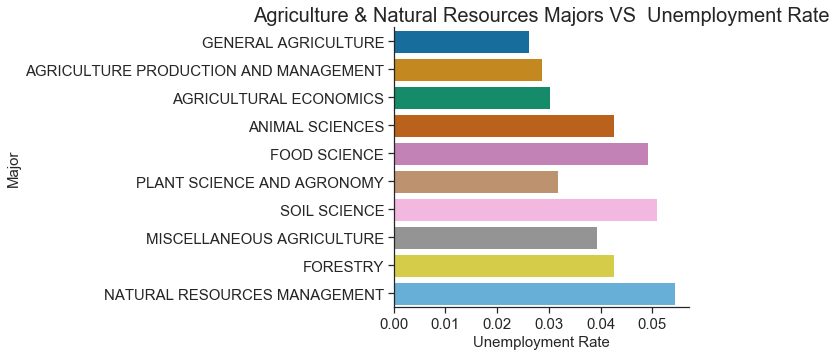

In [14]:
sns.set_style('ticks')

ax = sns.catplot(x="Unemployment_rate", y="Major",
            aspect=2, orient="h", height=5,
            kind="bar", 
            data=agriculture, 
            palette="colorblind");

ax.set(xlabel='Unemployment Rate', ylabel='Major', title="Agriculture & Natural Resources Majors VS  Unemployment Rate")
plt.show()

In [15]:
agriculture[['Total','Employed', 'Unemployed', 'Unemployment_rate']].describe()

,Total,Employed,Unemployed,Unemployment_rate
count,10.000000,10.00000,10.000000,10.000000
mean,63243.700000,48041.50000,1855.100000,0.039569
std,42349.780716,32088.13436,1270.963628,0.010023
min,6586.000000,4926.00000,261.000000,0.026147
25%,26698.750000,19541.00000,839.250000,0.030634
50%,74428.000000,55635.50000,2107.000000,0.040897
75%,92291.500000,74133.00000,2383.750000,0.047561
max,128148.000000,90245.00000,3789.000000,0.054341


### Biology & Life Science

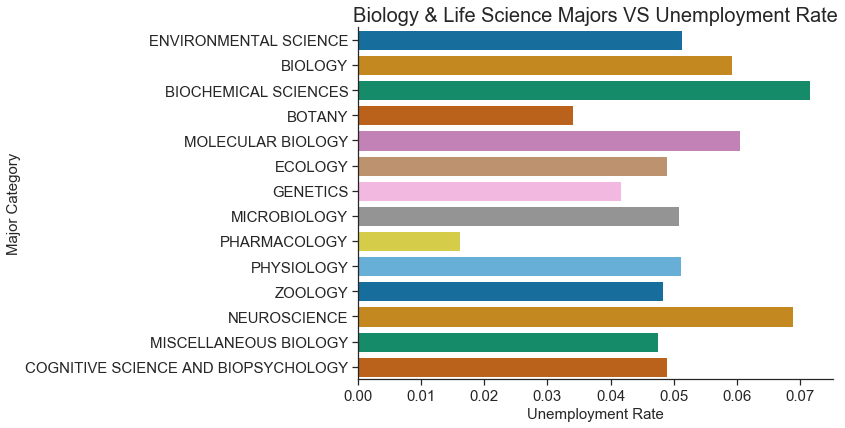

In [16]:
sns.set_style('ticks')

ax = sns.catplot(x="Unemployment_rate", y="Major",
            aspect=2, orient="h", height=6,
            kind="bar", 
            data=bio, 
            palette="colorblind");

ax.set(xlabel='Unemployment Rate', ylabel='Major Category', title="Biology & Life Science Majors VS Unemployment Rate")
plt.show()

In [17]:
bio[['Total','Employed', 'Unemployed', 'Unemployment_rate']].describe()

,Total,Employed,Unemployed,Unemployment_rate
count,14.000000,14.00000,14.000000,14.000000
mean,95584.714286,67647.00000,4095.357143,0.049936
std,216203.287262,150170.59092,9504.718412,0.013896
min,5015.000000,3481.00000,57.000000,0.016111
25%,13790.750000,9061.25000,411.500000,0.047777
50%,36686.500000,26846.00000,1497.500000,0.049899
75%,65512.500000,43243.50000,2298.250000,0.057298
max,839454.000000,583079.00000,36757.000000,0.071598


### Engineering

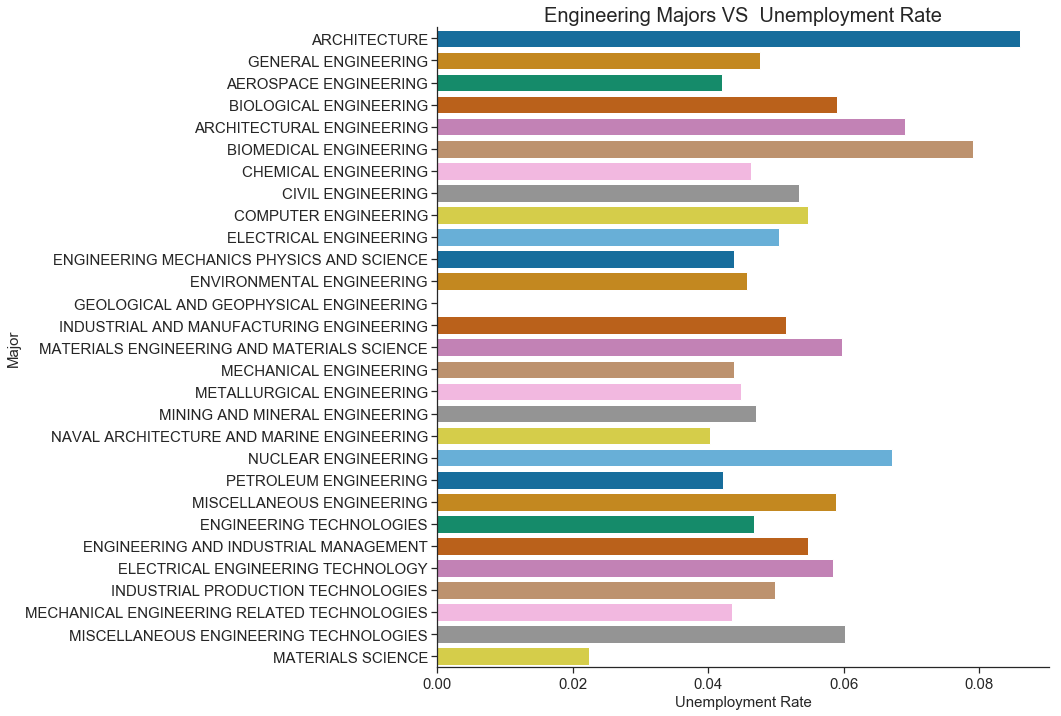

In [18]:
sns.set_style('ticks')

ax = sns.catplot(x="Unemployment_rate", y="Major",
            aspect=1.5, orient="h", height=10,
            kind="bar", 
            data=eng, 
            palette="colorblind");

ax.set(xlabel='Unemployment Rate', ylabel='Major', title="Engineering Majors VS  Unemployment Rate")
plt.show()

In [19]:
eng[['Total','Employed', 'Unemployed', 'Unemployment_rate']].describe()

,Total,Employed,Unemployed,Unemployment_rate
count,29.000000,29.000000,29.000000,29.000000
mean,123310.793103,90412.620690,5047.896552,0.050630
std,182341.776216,132453.131254,7244.983818,0.015761
min,6264.000000,4120.000000,0.000000,0.000000
25%,18347.000000,12876.000000,617.000000,0.043844
50%,37382.000000,27275.000000,1521.000000,0.049846
75%,138366.000000,101273.000000,5498.000000,0.058821
max,671647.000000,489965.000000,26064.000000,0.085991


### Business

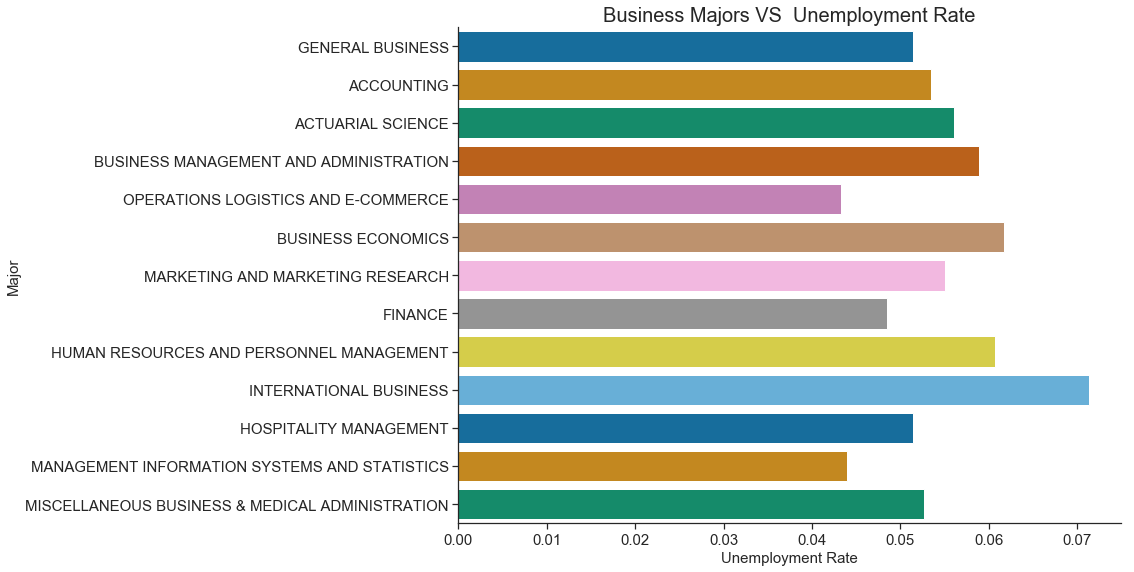

In [20]:
sns.set_style('ticks')

ax = sns.catplot(x="Unemployment_rate", y="Major",
            aspect=2, orient="h", height=8,
            kind="bar", 
            data=bus, 
            palette="colorblind");

ax.set(xlabel='Unemployment Rate', ylabel='Major', title="Business Majors VS  Unemployment Rate")
plt.show()

In [21]:
bus[['Total','Employed', 'Unemployed', 'Unemployment_rate']].describe()

,Total,Employed,Unemployed,Unemployment_rate
count,1.300000e+01,1.300000e+01,13.000000,13.000000
mean,7.583647e+05,5.792193e+05,33415.153846,0.054496
std,1.004096e+06,7.521685e+05,45004.586103,0.007606
min,9.763000e+03,7.846000e+03,466.000000,0.043268
25%,8.606400e+04,6.645300e+04,4308.000000,0.051378
50%,1.872740e+05,1.428790e+05,8862.000000,0.053415
75%,1.114624e+06,8.901250e+05,51839.000000,0.058865
max,3.123510e+06,2.354398e+06,147261.000000,0.071354


### Humanities & Liberal Arts Majors

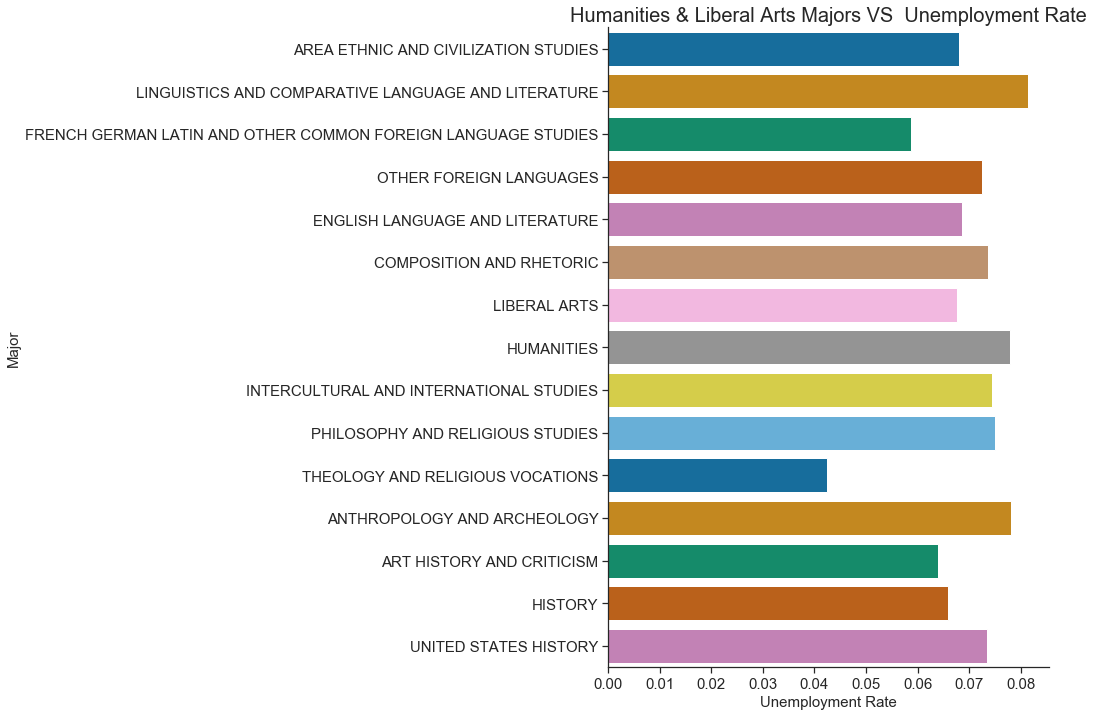

In [22]:
sns.set_style('ticks')

ax = sns.catplot(x="Unemployment_rate", y="Major",
            aspect=1.5, orient="h", height=10,
            kind="bar", 
            data=hum, 
            palette="colorblind");

ax.set(xlabel='Unemployment Rate', ylabel='Major', title="Humanities & Liberal Arts Majors VS  Unemployment Rate")
plt.show()

In [23]:
hum[['Total','Employed', 'Unemployed', 'Unemployment_rate']].describe()

,Total,Employed,Unemployed,Unemployment_rate
count,1.500000e+01,15.000000,15.000000,15.000000
mean,2.492223e+05,166611.666667,11942.400000,0.069429
std,3.110623e+05,203046.491023,14737.287068,0.009543
min,1.774600e+04,11887.000000,943.000000,0.042505
25%,5.850200e+04,44013.500000,3515.500000,0.066715
50%,1.037400e+05,75798.000000,5525.000000,0.072374
75%,2.346035e+05,159240.500000,10425.000000,0.074675
max,1.098647e+06,708882.000000,52248.000000,0.081348


### Communications & Journalism

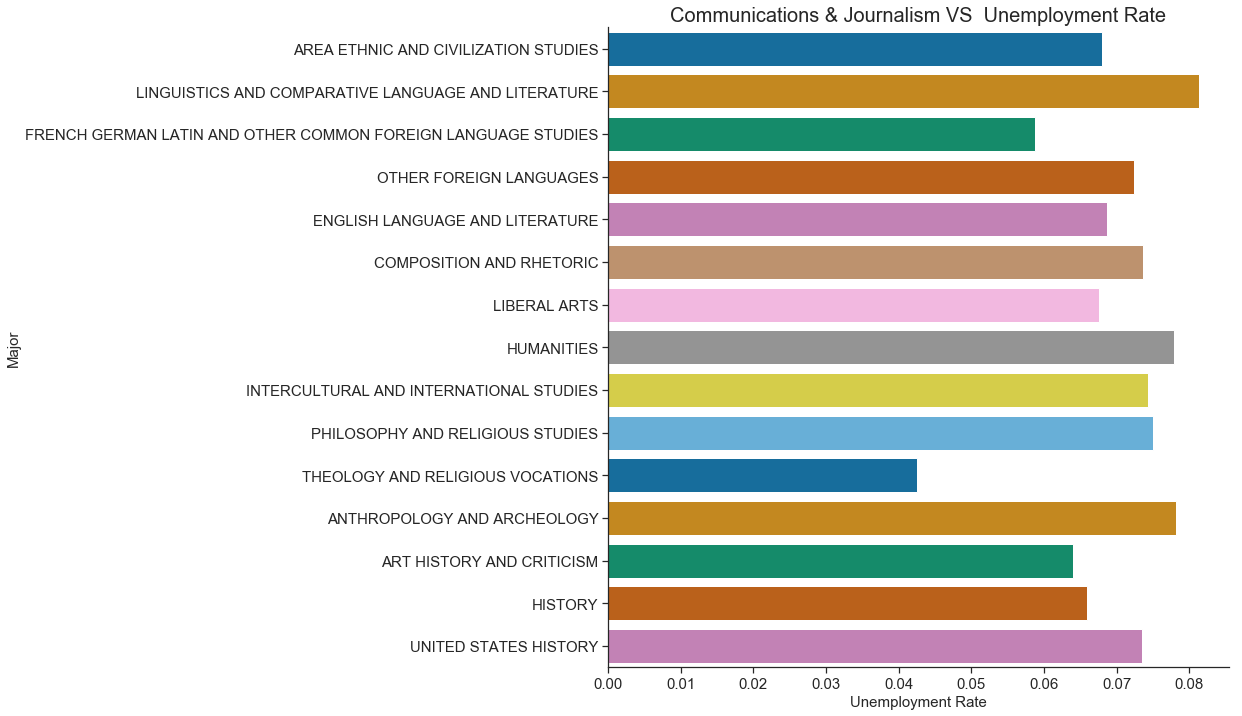

In [24]:
sns.set_style('ticks')

ax = sns.catplot(x="Unemployment_rate", y="Major",
            aspect=1.75, orient="h", height=10,
            kind="bar", 
            data=hum, 
            palette="colorblind");

ax.set(xlabel='Unemployment Rate', ylabel='Major', title="Communications & Journalism VS  Unemployment Rate")
plt.show()

In [25]:
com[['Total','Employed', 'Unemployed', 'Unemployment_rate']].describe()

,Total,Employed,Unemployed,Unemployment_rate
count,4.000000,4.000000,4.000000,4.000000
mean,450955.500000,355760.250000,25299.750000,0.069125
std,372553.079208,299225.596334,19829.913034,0.009504
min,186829.000000,147433.000000,10624.000000,0.061917
25%,205117.000000,164713.750000,14229.250000,0.063749
50%,314658.500000,242456.000000,18092.500000,0.065788
75%,560497.000000,433502.500000,29163.000000,0.071163
max,987676.000000,790696.000000,54390.000000,0.083005


### Computers & Mathematics

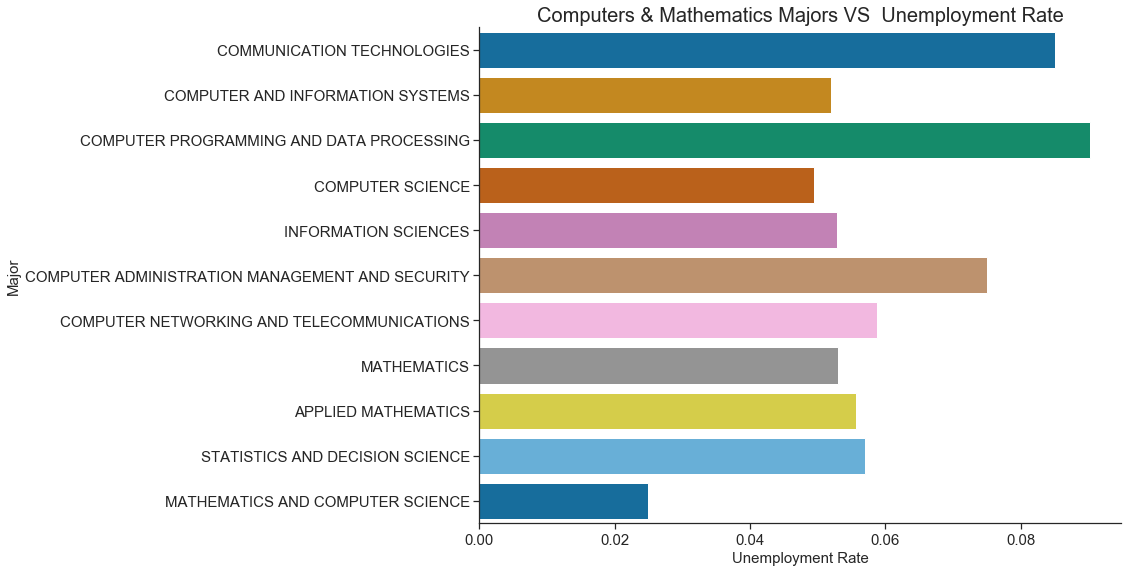

In [26]:
sns.set_style('ticks')

ax = sns.catplot(x="Unemployment_rate", y="Major",
            aspect=2, orient="h", height=8,
            kind="bar", 
            data=math, 
            palette="colorblind");

ax.set(xlabel='Unemployment Rate', ylabel='Major', title="Computers & Mathematics Majors VS  Unemployment Rate")
plt.show()

In [27]:
math[['Total','Employed', 'Unemployed', 'Unemployment_rate']].describe()

,Total,Employed,Unemployed,Unemployment_rate
count,11.000000,11.000000,11.000000,11.000000
mean,161943.454545,128237.000000,7270.363636,0.059437
std,243480.310327,196841.985049,10167.517350,0.018172
min,7184.000000,5874.000000,150.000000,0.024900
25%,27061.500000,20818.000000,1701.500000,0.052366
50%,51771.000000,44071.000000,2748.000000,0.055653
75%,165793.500000,142320.500000,8277.000000,0.066870
max,783292.000000,656372.000000,34196.000000,0.090264


### Industrial Arts & Consumer Services

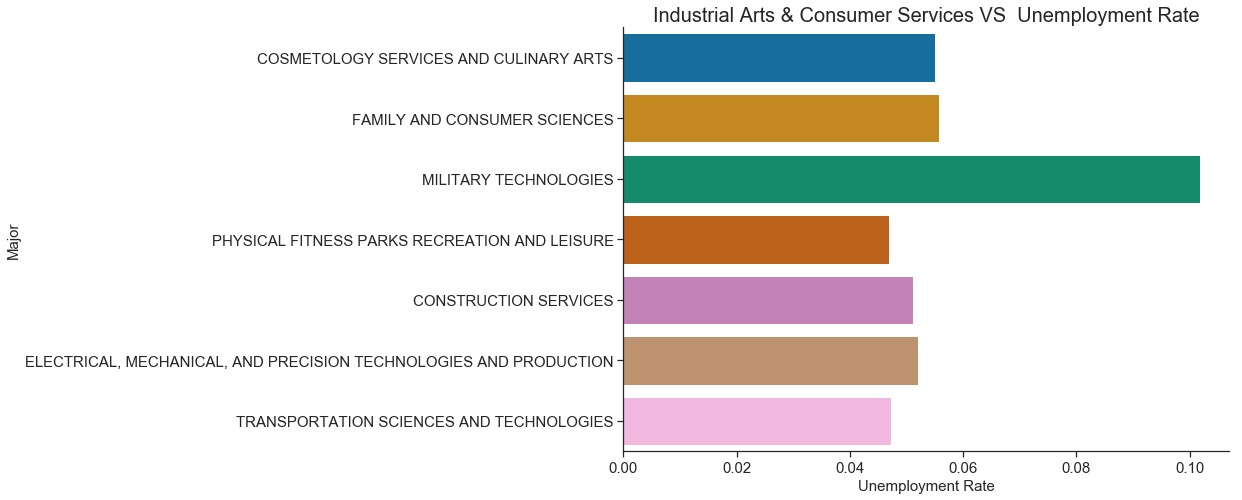

In [28]:
sns.set_style('ticks')

ax = sns.catplot(x="Unemployment_rate", y="Major",
            aspect=2.5, orient="h", height=7,
            kind="bar", 
            data=indust, 
            palette="colorblind");

ax.set(xlabel='Unemployment Rate', ylabel='Major', title="Industrial Arts & Consumer Services VS  Unemployment Rate")
plt.show()

In [29]:
indust[['Total','Employed', 'Unemployed', 'Unemployment_rate']].describe()

,Total,Employed,Unemployed,Unemployment_rate
count,7.000000,7.000000,7.000000,7.000000
mean,147685.428571,107683.142857,5765.714286,0.058546
std,162463.673889,113042.143350,6006.703636,0.019373
min,4315.000000,1650.000000,187.000000,0.046903
25%,29025.500000,22997.500000,1316.500000,0.049180
50%,92346.000000,79055.000000,4257.000000,0.052034
75%,238524.000000,170199.500000,9505.000000,0.055363
max,402038.000000,286683.000000,14273.000000,0.101796


### Education 

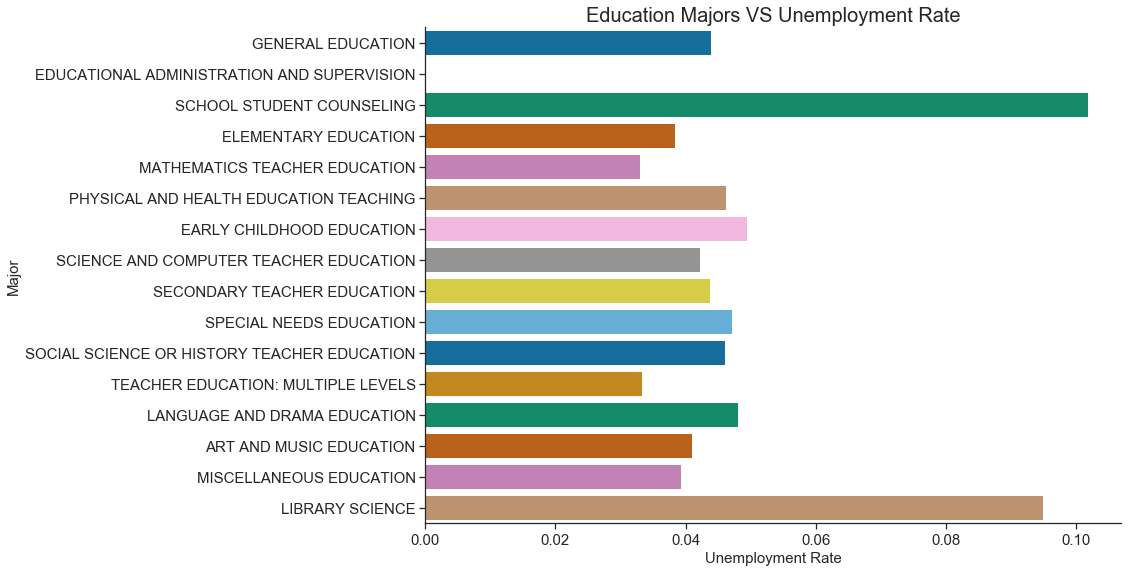

In [30]:
sns.set_style('ticks')

ax = sns.catplot(x="Unemployment_rate", y="Major",
            aspect=2, orient="h", height=8,
            kind="bar", 
            data=edu, 
            palette="colorblind");

ax.set(xlabel='Unemployment Rate', ylabel='Major', title="Education Majors VS Unemployment Rate")
plt.show()

In [31]:
edu[['Total','Employed', 'Unemployed', 'Unemployment_rate']].describe()

,Total,Employed,Unemployed,Unemployment_rate
count,16.000,16.000000,16.000000,16.000000
mean,293757.375,177074.937500,7833.500000,0.046762
std,456723.802,261533.230387,11255.853944,0.023238
min,2396.000,1492.000000,0.000000,0.000000
25%,65725.250,44458.250000,1606.500000,0.039001
50%,153384.000,109809.500000,5251.000000,0.043830
75%,227130.000,135904.250000,6101.000000,0.047379
max,1446701.000,843693.000000,38742.000000,0.101746


### Law & Public Policy

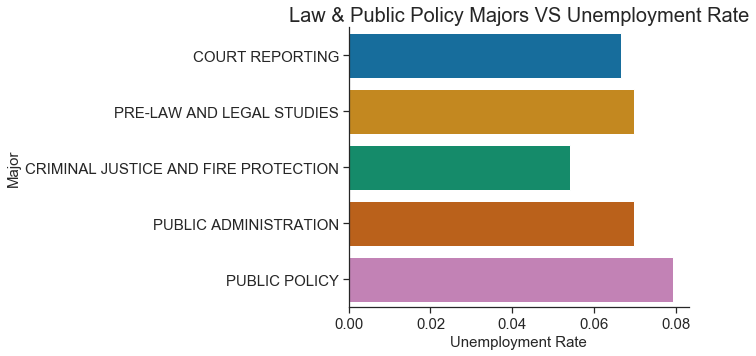

In [32]:
sns.set_style('ticks')

ax = sns.catplot(x="Unemployment_rate", y="Major",
            aspect=2, orient="h", height=5,
            kind="bar", 
            data=law, 
            palette="colorblind");

ax.set(xlabel='Unemployment Rate', ylabel='Major', title="Law & Public Policy Majors VS Unemployment Rate")
plt.show()

In [33]:
law[['Total','Employed', 'Unemployed', 'Unemployment_rate']].describe()

,Total,Employed,Unemployed,Unemployment_rate
count,5.000000,5.00000,5.000000,5.000000
mean,180585.200000,143784.80000,8609.800000,0.067854
std,323261.515601,263101.48367,14831.230485,0.009070
min,9330.000000,7270.00000,518.000000,0.054036
25%,14782.000000,11147.00000,959.000000,0.066513
50%,54636.000000,37879.00000,2836.000000,0.069655
75%,67037.000000,49259.00000,3699.000000,0.069848
max,757141.000000,613369.00000,35037.000000,0.079217


### Interdisciplinary

* Insufficent data to create graph for this major concentration 

In [34]:
interdis[['Total','Employed', 'Unemployed', 'Unemployment_rate']].describe()

,Total,Employed,Unemployed,Unemployment_rate
count,1.0,1.0,1.0,1.000000
mean,45199.0,35706.0,2990.0,0.077269
std,NaN,NaN,NaN,NaN
min,45199.0,35706.0,2990.0,0.077269
25%,45199.0,35706.0,2990.0,0.077269
50%,45199.0,35706.0,2990.0,0.077269
75%,45199.0,35706.0,2990.0,0.077269
max,45199.0,35706.0,2990.0,0.077269


### Health 

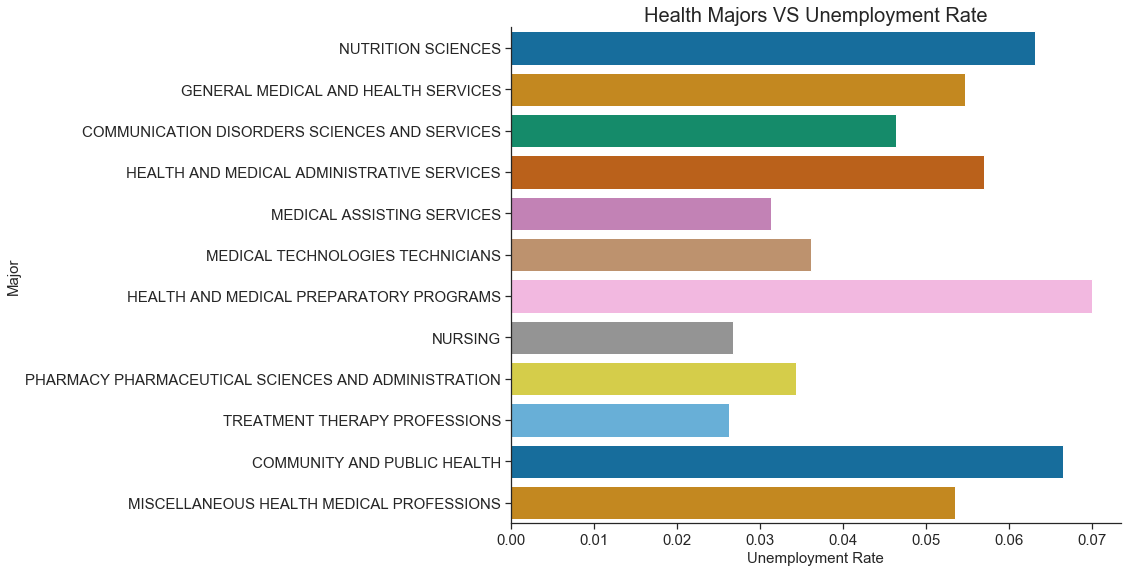

In [35]:
sns.set_style('ticks')

ax = sns.catplot(x="Unemployment_rate", y="Major",
            aspect=2, orient="h", height=8,
            kind="bar", 
            data=heal, 
            palette="colorblind");

ax.set(xlabel='Unemployment Rate', ylabel='Major', title="Health Majors VS Unemployment Rate")
plt.show()

In [36]:
heal[['Total','Employed', 'Unemployed', 'Unemployment_rate']].describe()

,Total,Employed,Unemployed,Unemployment_rate
count,1.200000e+01,1.200000e+01,12.000000,12.000000
mean,2.459049e+05,1.827243e+05,6251.083333,0.047209
std,4.840209e+05,3.633186e+05,9616.841926,0.015766
min,3.251400e+04,1.900900e+04,1431.000000,0.026292
25%,6.447950e+04,4.801425e+04,2822.500000,0.033607
50%,9.108150e+04,6.540400e+04,3723.000000,0.050020
75%,1.687635e+05,1.221238e+05,4713.000000,0.058557
max,1.769892e+06,1.325711e+06,36503.000000,0.070010


### Social Science

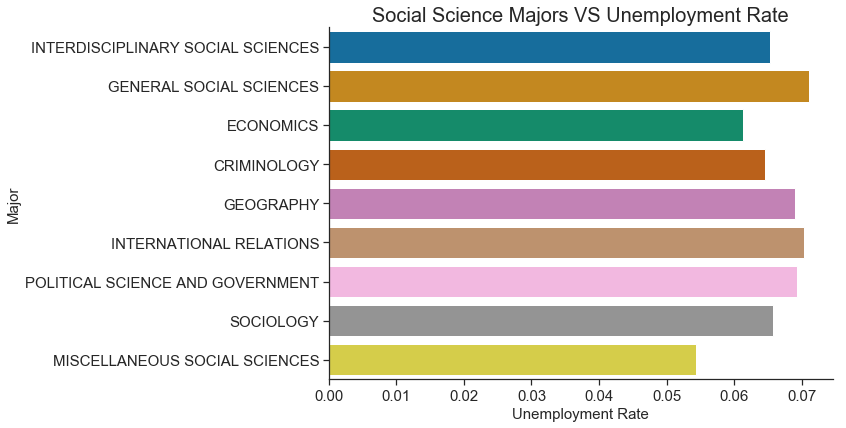

In [37]:
sns.set_style('ticks')

ax = sns.catplot(x="Unemployment_rate", y="Major",
            aspect=2, orient="h", height=6,
            kind="bar", 
            data=soc, 
            palette="colorblind");

ax.set(xlabel='Unemployment Rate', ylabel='Major', title="Social Science Majors VS Unemployment Rate")
plt.show()

In [38]:
soc[['Total','Employed', 'Unemployed', 'Unemployment_rate']].describe()

,Total,Employed,Unemployed,Unemployment_rate
count,9.000000,9.000000,9.000000,9.000000
mean,294902.777778,207978.111111,14683.333333,0.065686
std,326436.219616,230165.870648,16124.681392,0.005278
min,15882.000000,12307.000000,708.000000,0.054399
25%,75085.000000,56564.000000,4106.000000,0.064519
50%,115423.000000,80165.000000,6132.000000,0.065804
75%,674558.000000,459174.000000,32344.000000,0.069374
max,757616.000000,541630.000000,40376.000000,0.071057


### Physical Sciences

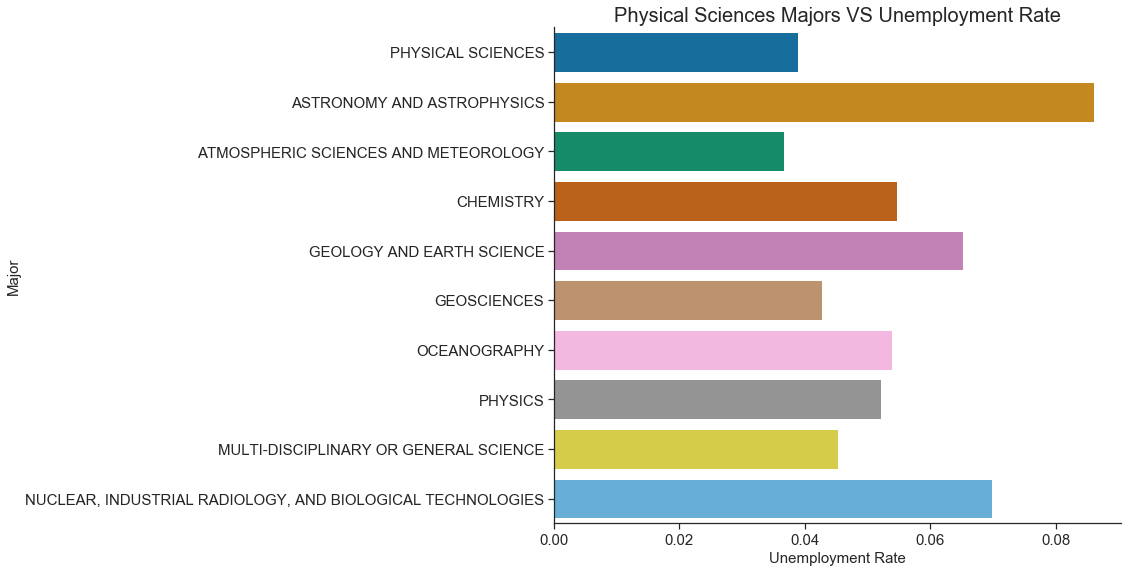

In [39]:
sns.set_style('ticks')

ax = sns.catplot(x="Unemployment_rate", y="Major",
            aspect=2, orient="h", height=8,
            kind="bar", 
            data=physci, 
            palette="colorblind");

ax.set(xlabel='Unemployment Rate', ylabel='Major', title="Physical Sciences Majors VS Unemployment Rate")
plt.show()

In [40]:
physci[['Total','Employed', 'Unemployed', 'Unemployment_rate']].describe()

,Total,Employed,Unemployed,Unemployment_rate
count,10.000000,10.000000,10.000000,10.000000
mean,102531.800000,70712.600000,3822.100000,0.054541
std,149155.565772,103816.745933,5245.243124,0.015380
min,4700.000000,3400.000000,238.000000,0.036726
25%,9327.250000,6567.250000,347.250000,0.043402
50%,13108.500000,10406.000000,583.500000,0.052993
75%,118940.500000,79522.250000,5064.000000,0.062515
max,427953.000000,308461.000000,14613.000000,0.086022


### Psychology & Social Work

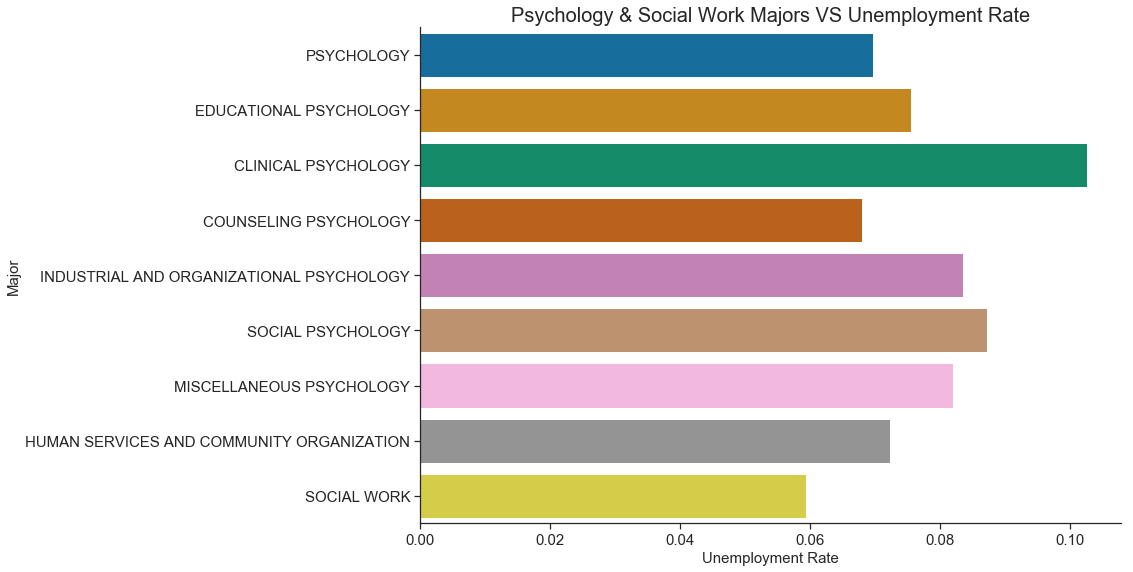

In [41]:
sns.set_style('ticks')

ax = sns.catplot(x="Unemployment_rate", y="Major",
            aspect=2, orient="h", height=8,
            kind="bar", 
            data=psy, 
            palette="colorblind");

ax.set(xlabel='Unemployment Rate', ylabel='Major', title="Psychology & Social Work Majors VS Unemployment Rate")
plt.show()

In [42]:
psy[['Total','Employed', 'Unemployed', 'Unemployment_rate']].describe()

,Total,Employed,Unemployed,Unemployment_rate
count,9.000000e+00,9.000000e+00,9.000000,9.000000
mean,2.208087e+05,1.568870e+05,11578.444444,0.077867
std,4.840448e+05,3.443785e+05,25684.828791,0.012738
min,7.638000e+03,5.128000e+03,587.000000,0.059376
25%,1.404100e+04,8.751000e+03,716.000000,0.069667
50%,1.796900e+04,1.307100e+04,1084.000000,0.075631
75%,8.178600e+04,6.140200e+04,4794.000000,0.083629
max,1.484075e+06,1.055854e+06,79066.000000,0.102712


# Part 2

In addition to the comprehensive, all-ages dataset, the github
repository also contains data regarding just recent college graduates
(ages < 28). 

Comparing this subset of data to the whole dataset that
it comes from (all-ages) can provide us with some information about
recent trends. Which majors appear to have experienced a relative boom
among recent graduates and which majors are dropping off in
popularity? Again, explore visual ways of describing the answer as
well as numerical ones.

In [200]:
data2 = pd.read_csv("C:/Users/Jaqua/Desktop/Data Fellowship Challenge/college-majors/recent-grads.csv").sort_values(by=['Major'])

In [352]:
data2.head(5)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
40,41,6201,ACCOUNTING,198633.0,94519.0,104114.0,Business,0.524153,2042,165527,...,27693,123169,12411,0.069749,45000,34000,56000,11417,39323,10886
6,7,6202,ACTUARIAL SCIENCE,3777.0,2110.0,1667.0,Business,0.441356,51,2912,...,296,2482,308,0.095652,62000,53000,72000,1768,314,259
98,99,1904,ADVERTISING AND PUBLIC RELATIONS,53162.0,12862.0,40300.0,Communications & Journalism,0.758060,681,45326,...,10948,30932,3305,0.067961,35000,27000,47000,9659,23059,7214
11,12,2401,AEROSPACE ENGINEERING,15058.0,12953.0,2105.0,Engineering,0.139793,147,11391,...,2724,8790,794,0.065162,60000,42000,70000,8184,2425,372
71,72,1102,AGRICULTURAL ECONOMICS,2439.0,1749.0,690.0,Agriculture & Natural Resources,0.282903,44,2174,...,620,1528,182,0.077250,40000,27000,54000,535,893,94


In [124]:
data.head(5)

,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
159,6201,ACCOUNTING,Business,1779219,1335825,1095027,75379,0.053415,65000,42500,100000.0
160,6202,ACTUARIAL SCIENCE,Business,9763,7846,6880,466,0.056064,72000,53000,115000.0
16,1904,ADVERTISING AND PUBLIC RELATIONS,Communications & Journalism,186829,147433,111552,10624,0.067216,50000,34000,75000.0
41,2401,AEROSPACE ENGINEERING,Engineering,65734,44944,38491,1969,0.041971,80000,58000,110000.0
2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000.0


In [61]:
data.drop(['Major_code'], axis=1).corr()

,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
Total,1.000000,0.994976,0.984676,0.962231,-0.066473,-0.034050,-0.007415,-0.019955
Employed,0.994976,1.000000,0.995810,0.969786,-0.063512,-0.017141,0.007938,-0.000463
Employed_full_time_year_round,0.984676,0.995810,1.000000,0.969176,-0.063851,0.012629,0.035048,0.031411
Unemployed,0.962231,0.969786,0.969176,1.000000,0.026502,-0.046304,-0.037490,-0.009963
Unemployment_rate,-0.066473,-0.063512,-0.063851,0.026502,1.000000,-0.301946,-0.341396,-0.279099
Median,-0.034050,-0.017141,0.012629,-0.046304,-0.301946,1.000000,0.950014,0.950099
P25th,-0.007415,0.007938,0.035048,-0.037490,-0.341396,0.950014,1.000000,0.867066
P75th,-0.019955,-0.000463,0.031411,-0.009963,-0.279099,0.950099,0.867066,1.000000


In [51]:
data2.drop(['Major_code', 'Rank'], axis=1).corr()

,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
Total,1.000000,0.878088,0.944764,0.142999,0.945575,0.996214,0.989339,0.950268,0.981112,0.974768,0.083192,-0.106738,-0.071926,-0.083198,0.800465,0.941247,0.935510
Men,0.878088,1.000000,0.672759,-0.112014,0.875176,0.870605,0.893563,0.751592,0.892454,0.869411,0.101502,0.025991,0.038725,0.052393,0.563168,0.851500,0.791336
Women,0.944764,0.672759,1.000000,0.297832,0.862606,0.944037,0.917681,0.954513,0.905720,0.911694,0.059108,-0.182842,-0.137738,-0.164528,0.851946,0.872132,0.904470
ShareWomen,0.142999,-0.112014,0.297832,1.000000,0.097496,0.147547,0.120200,0.212290,0.112523,0.121243,0.073205,-0.618690,-0.500199,-0.586932,0.195550,0.137007,0.187850
Sample_size,0.945575,0.875176,0.862606,0.097496,1.000000,0.964462,0.978396,0.824824,0.985235,0.918059,0.059872,-0.067578,-0.025229,-0.055737,0.701704,0.915464,0.860319
Employed,0.996214,0.870605,0.944037,0.147547,0.964462,1.000000,0.995838,0.934528,0.991047,0.968900,0.068056,-0.107547,-0.067514,-0.087560,0.797534,0.941326,0.927224
Full_time,0.989339,0.893563,0.917681,0.120200,0.978396,0.995838,1.000000,0.900877,0.998203,0.960102,0.063349,-0.082258,-0.042957,-0.065073,0.772515,0.933124,0.904852
Part_time,0.950268,0.751592,0.954513,0.212290,0.824824,0.934528,0.900877,1.000000,0.880855,0.945094,0.108944,-0.190124,-0.153509,-0.158220,0.804987,0.909634,0.951593
Full_time_year_round,0.981112,0.892454,0.905720,0.112523,0.985235,0.991047,0.998203,0.880855,1.000000,0.950711,0.057171,-0.072982,-0.033034,-0.056932,0.755254,0.928874,0.892847
Unemployed,0.974768,0.869411,0.911694,0.121243,0.918059,0.968900,0.960102,0.945094,0.950711,1.000000,0.165282,-0.126386,-0.092185,-0.097128,0.713804,0.956532,0.955388


In [301]:
differences1 = pd.DataFrame()
differences2 = pd.DataFrame()

differences1 = data[['Major', 'Major_category','Total']]
differences2 = data2[['Major','Total']]

differences1 = data[['Major', 'Major_category','Total']]
differences2 = data2[['Major','Total']]

diff = pd.merge(differences1,differences2, on='Major', how='left')


diff['Percent Total_All'] = (diff['Total_x'] / diff['Total_x'].sum()) * 100
diff['Percent Total_Recent'] = (diff['Total_y'] / diff['Total_y'].sum()) * 100
diff['Percent Difference'] = (diff['Percent Total_Recent'] - diff['Percent Total_All'])

greatest_difference = diff.groupby('Major_category').agg({'Percent Difference':'sum', 
                                                   'Percent Total_All':'sum', 
                                                   'Percent Total_Recent' : 'sum'}).reset_index().sort_values('Percent Difference', 
                                                                                                  ascending=False)

In [344]:
top_inc = diff.sort_values(by=['Percent Difference'], ascending=False).head(10)
top_dec = diff.sort_values(by=['Percent Difference'], ascending=False).tail(11)

In [345]:
top_inc.head(-1)

,Major,Major_category,Total_x,Total_y,Percent Total_All,Percent Total_Recent,Percent Difference
152,PSYCHOLOGY,Psychology & Social Work,1484075,393735.0,3.725612,5.814458,2.088847
18,BIOLOGY,Biology & Life Science,839454,280709.0,2.107360,4.145354,2.037994
145,PHYSICAL FITNESS PARKS RECREATION AND LEISURE,Industrial Arts & Consumer Services,350409,125074.0,0.879664,1.847023,0.967359
150,POLITICAL SCIENCE AND GOVERNMENT,Social Science,748956,182621.0,1.880174,2.696845,0.816671
31,COMMUNICATIONS,Communications & Journalism,987676,213996.0,2.479455,3.160173,0.680718
64,FINANCE,Business,816548,174506.0,2.049857,2.577007,0.527151
16,BIOCHEMICAL SCIENCES,Biology & Life Science,75322,39107.0,0.189088,0.577510,0.388422
29,COMMUNICATION DISORDERS SCIENCES AND SERVICES,Health,74977,38279.0,0.188222,0.565283,0.377061
44,CRIMINAL JUSTICE AND FIRE PROTECTION,Law & Public Policy,757141,152824.0,1.900722,2.256819,0.356098


In [353]:
top_dec.head(-1)

,Major,Major_category,Total_x,Total_y,Percent Total_All,Percent Total_Recent,Percent Difference
72,GENERAL ENGINEERING,Engineering,503080,61152.0,1.262929,0.903059,-0.359870
119,MISCELLANEOUS EDUCATION,Education,225553,10150.0,0.566227,0.149890,-0.416337
97,LIBERAL ARTS,Humanities & Liberal Arts,601221,71369.0,1.509301,1.053937,-0.455364
52,ELECTRICAL ENGINEERING,Engineering,671647,81527.0,1.686098,1.203945,-0.482153
55,ELEMENTARY EDUCATION,Education,1446701,170862.0,3.631788,2.523194,-1.108594
135,NURSING,Health,1769892,209394.0,4.443125,3.092214,-1.350911
71,GENERAL EDUCATION,Education,1438867,143718.0,3.612122,2.122347,-1.489775
0,ACCOUNTING,Business,1779219,198633.0,4.466539,2.933301,-1.533238
70,GENERAL BUSINESS,Business,2148712,234590.0,5.394112,3.464294,-1.929818


In [347]:
top_dec.dropna(subset=['Major', 'Total_y'], inplace=True)

## Total Difference Rates By Category of Major

In [279]:
greatest_difference.head(-1)

,Major_category,Percent Difference,Percent Total_All,Percent Total_Recent
2,Biology & Life Science,3.343007,3.359373,6.702380
14,Psychology & Social Work,2.114393,4.988849,7.103242
4,Communications & Journalism,1.269410,4.528302,5.797712
15,Social Science,1.163344,6.662897,7.826242
9,Humanities & Liberal Arts,1.151406,9.384691,10.536096
10,Industrial Arts & Consumer Services,0.798200,2.595239,3.393440
1,Arts,0.740465,4.533431,5.273896
12,Law & Public Policy,0.378253,2.266699,2.644952
13,Physical Sciences,0.165099,2.573951,2.739050
11,Interdisciplinary,0.068113,0.113467,0.181580


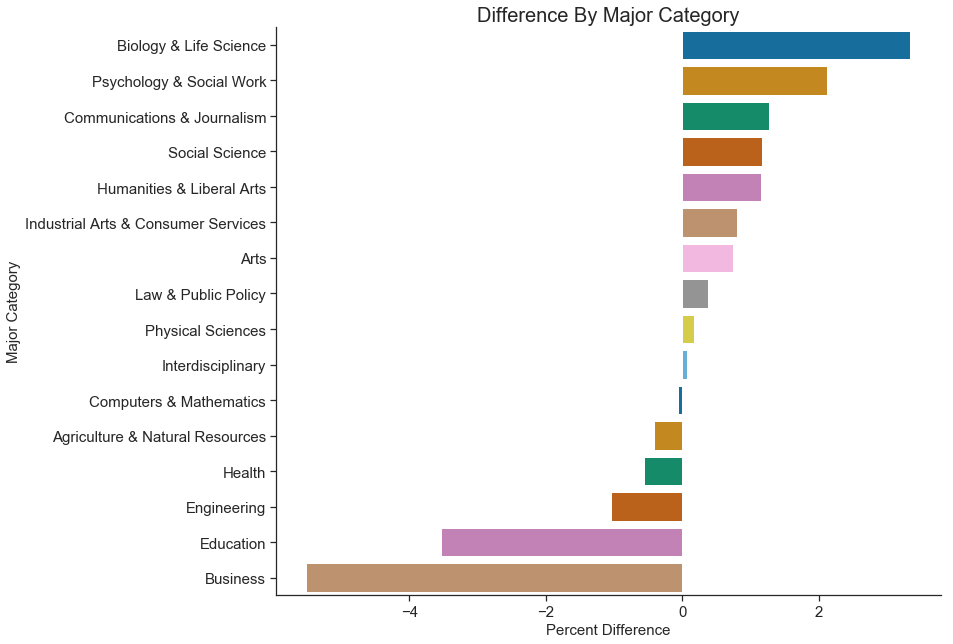

In [332]:
sns.set_style('ticks')

ax = sns.catplot(x="Percent Difference", y="Major_category",
            aspect=1.5, orient="h", height=9,
            kind="bar", 
            data=greatest_difference, 
            palette=sns.color_palette("colorblind", 16));

ax.set(xlabel='Percent Difference', ylabel='Major Category', title="Difference By Major Category")
plt.show()

## Top Difference Rates By Major Concentration

### Top Ten Decrease in Major Concentration

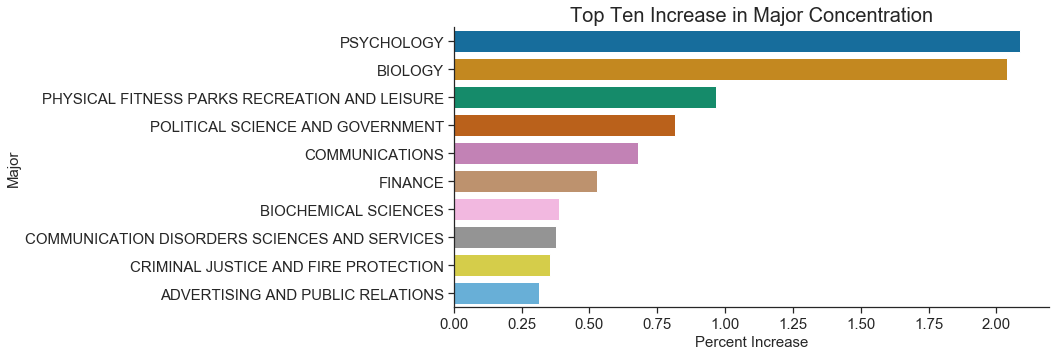

In [357]:
sns.set_style('ticks')

ax = sns.catplot(x="Percent Difference", y="Major",
            aspect=3, orient="h", height=5,
            kind="bar", 
            data=top_inc, 
            palette=sns.color_palette("colorblind", 16));

ax.set(xlabel='Percent Increase', ylabel='Major', title="Top Ten Increase in Major Concentration")
plt.show()

### Top Ten Decrease in Major Concentration

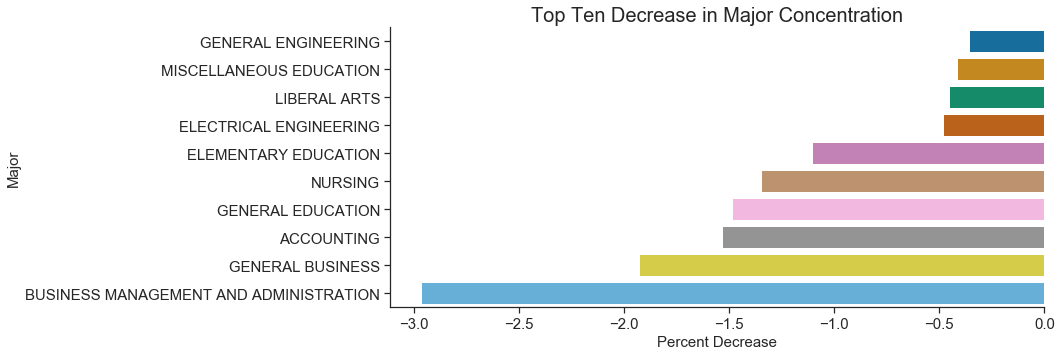

In [356]:
sns.set_style('ticks')

ax = sns.catplot(x="Percent Difference", y="Major",
            aspect=3, orient="h", height=5,
            kind="bar", 
            data=top_dec, 
            palette=sns.color_palette("colorblind", 16));

ax.set(xlabel='Percent Decrease', ylabel='Major', title="Top Ten Decrease in Major Concentration")
plt.show()

## Part 3

(Bonus) The previous two questions deal with only a small subset of the data contained in the repository. If you have some extra time (this question isn’t required for the application), we would be curious to see something else interesting you found while exploring the data. Additionally, if there are other variables or similar data sets that you could see being useful to add to this data set, feel free to mention them here! What would you use this additional data for? (Don’t worry, you don’t need to actually do the linking, this is more of a hypothetical question).

In [358]:
data3 = pd.read_csv("C:/Users/Jaqua/Desktop/Data Fellowship Challenge/college-majors/women-stem.csv").sort_values(by=['Major'])

#### Last year, I wrote a paper on the history of women in STEM. I was curious to see of the STEM majors, which were most/least popular amongst women. 

In [366]:
data3.head(5)

,Rank,Major_code,Major,Major_category,Total,Men,Women,ShareWomen,Median
8,9,2401,AEROSPACE ENGINEERING,Engineering,15058,12953,2105,0.139793,60000
32,33,3701,APPLIED MATHEMATICS,Computers & Mathematics,4939,2794,2145,0.434298,45000
17,18,2403,ARCHITECTURAL ENGINEERING,Engineering,2825,1835,990,0.350442,54000
46,47,1401,ARCHITECTURE,Engineering,46420,25463,20957,0.451465,40000
6,7,5001,ASTRONOMY AND ASTROPHYSICS,Physical Sciences,1792,832,960,0.535714,62000


In [371]:
most_pop = data3.sort_values(by=['Women'], ascending=False).head(10)
least_pop = data3.sort_values(by=['Women'], ascending=False).tail(10)

### STEM Majors Among Women

In [369]:
most_pop

,Rank,Major_code,Major,Major_category,Total,Men,Women,ShareWomen,Median
26,27,6107,NURSING,Health,209394,21773,187621,0.896019,48000
70,71,3600,BIOLOGY,Biology & Life Science,280709,111762,168947,0.601858,33400
74,75,6102,COMMUNICATION DISORDERS SCIENCES AND SERVICES,Health,38279,1225,37054,0.967998,28000
62,63,5098,MULTI-DISCIPLINARY OR GENERAL SCIENCE,Physical Sciences,62052,27015,35037,0.564639,35000
72,73,6109,TREATMENT THERAPY PROFESSIONS,Health,48491,13487,35004,0.721866,33000
50,51,5003,CHEMISTRY,Physical Sciences,66530,32923,33607,0.505141,39000
33,34,3700,MATHEMATICS,Computers & Mathematics,72397,39956,32441,0.448099,45000
18,19,2102,COMPUTER SCIENCE,Computers & Mathematics,128319,99743,28576,0.222695,53000
73,74,6100,GENERAL MEDICAL AND HEALTH SERVICES,Health,33599,7574,26025,0.774577,32400
46,47,1401,ARCHITECTURE,Engineering,46420,25463,20957,0.451465,40000


In [372]:
least_pop

,Rank,Major_code,Major,Major_category,Total,Men,Women,ShareWomen,Median
45,46,5000,PHYSICAL SCIENCES,Physical Sciences,1436,894,542,0.377437,40000
38,39,2501,ENGINEERING AND INDUSTRIAL MANAGEMENT,Engineering,2906,2400,506,0.174123,44000
4,5,2418,NUCLEAR ENGINEERING,Engineering,2573,2200,373,0.144967,65000
43,44,2504,MECHANICAL ENGINEERING RELATED TECHNOLOGIES,Engineering,4790,4419,371,0.077453,40000
0,1,2419,PETROLEUM ENGINEERING,Engineering,2339,2057,282,0.120564,110000
24,25,2411,GEOLOGICAL AND GEOPHYSICAL ENGINEERING,Engineering,720,488,232,0.322222,50000
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,1258,1123,135,0.107313,70000
2,3,2415,METALLURGICAL ENGINEERING,Engineering,856,725,131,0.153037,73000
39,40,4005,MATHEMATICS AND COMPUTER SCIENCE,Computers & Mathematics,609,500,109,0.178982,42000
1,2,2416,MINING AND MINERAL ENGINEERING,Engineering,756,679,77,0.101852,75000


### Top Ten STEM Majors Most Popular Among Women

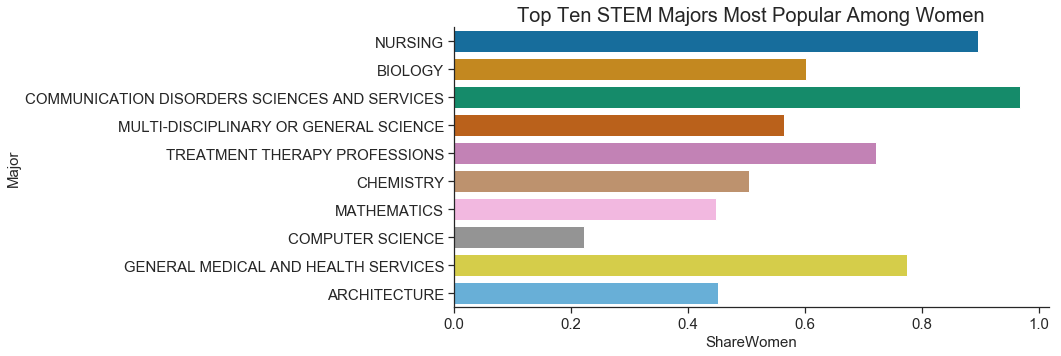

In [380]:
sns.set_style('ticks')

ax = sns.catplot(x="ShareWomen", y="Major",
            aspect=3, orient="h", height=5,
            kind="bar", 
            data=most_pop, 
            palette=sns.color_palette("colorblind", 16));

ax.set(xlabel='ShareWomen', ylabel='Major', title="Top Ten STEM Majors Most Popular Among Women")
plt.show()

### Top Ten STEM Majors Least Popular Among Women

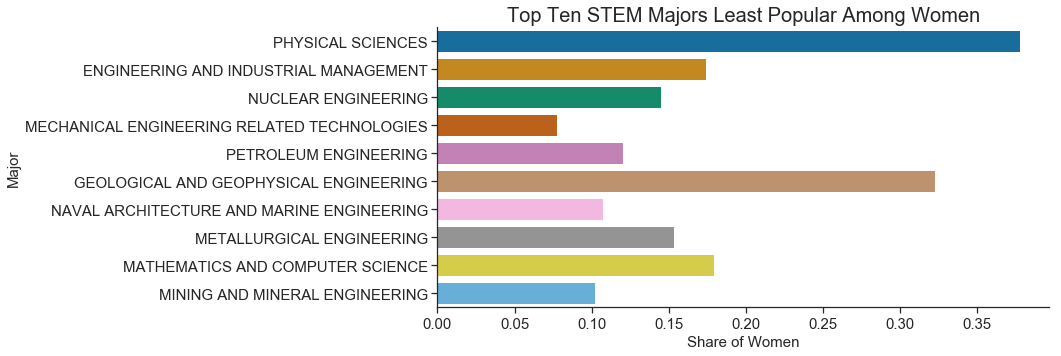

In [381]:
sns.set_style('ticks')

ax = sns.catplot(x="ShareWomen", y="Major",
            aspect=3, orient="h", height=5,
            kind="bar", 
            data=least_pop, 
            palette=sns.color_palette("colorblind", 16));

ax.set(xlabel='Share of Women', ylabel='Major', title="Top Ten STEM Majors Least Popular Among Women")
plt.show()